# **Sesión 1:** Calibración de Cámara 📷⚙️

## **Instalaciones**

In [179]:
!pip install imageio opencv-python

## **Librerías**

In [180]:
from typing import List
import numpy as np
import imageio
import cv2
import copy
import glob
import os
from os.path import dirname, join

## **Apartado A: Calibración de cámara** (derecha e izquierda)

En este apartado se realiza la calibración de dos cámaras de un sistema estereoscópico. Para ello se trabajará con las imágenes de las carpetas ``left`` y ``right``. En primer lugar se trabajará con la carpeta ``left``. Posteriormente, deberá repetir el proceso con las imágenes en la carpeta ``right``. Ambas carpetas contienen imágenes con las que se calibrarán las cámaras. En ellas aparece el patrón de calibración en diferentes posiciones y orientaciones. Estas imágenes serán los datos de entrada.

Los pasos que deberá seguir para calibrar una cámara son:

1. Defina y ejecute el método para cargar imágenes ``load_images()``.
2. Detecte las esquinas de los patrones usando ``cv2.findChessboardCorners()``. Refine las detecciones con ``cv2.cornerSubPix()``.
3. Compruebe que las detecciones son correctas dibujando los resultados con ``cv2.drawChessboardCorners()``.
4. Defina y ejecute el método ``get_chessboard_points(chessboard_shape, dx, dy)`` que proporcione las coordenadas 3D de las esquinas del patrón. El sistema de referencia utilizado deberá estar anclado al propio patrón.
5. Utilice ``cv2.calibrateCamera`` para obtener los parámetros de calibración para la cámara izquierda.

### **Tarea A.1:** Defina y ejecute el método para cargar imágenes ``load_images()``.

In [181]:
def load_images(filenames: List) -> List:
    return [imageio.imread(filename) for filename in filenames]

In [182]:
# TODO Build a list containing the paths of all images from the left camera
path = join(dirname(os.getcwd()), "data", "left")
imgs_path = [join(path, f"{img_path}") for img_path in os.listdir(path)]
imgs = load_images(imgs_path)


C:\Users\Jose Juan\AppData\Local\Temp\ipykernel_14840\283608422.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


### **Tarea A.2:** Detecte las esquinas de los patrones usando ``cv2.findChessboardCorners()``. Refine las detecciones con ``cv2.cornerSubPix()``.

In [183]:
# TODO Find corners with cv2.findChessboardCorners()
corners = [cv2.findChessboardCorners(img,(8,6),None) for img in imgs]



In [184]:
corners_copy = copy.deepcopy(corners)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# TODO To refine corner detections with cv2.cornerSubPix() you need to input grayscale images. Build a list containing grayscale images.
imgs_gray = [cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in imgs]

corners_refined = [cv2.cornerSubPix(i, cor[1], (8,6), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_gray, corners_copy)]


### **Tarea A.3:** Compruebe que las detecciones son correctas dibujando los resultados con ``cv2.drawChessboardCorners()``

In [185]:
imgs_copy = copy.deepcopy(imgs)


In [186]:
# TODO Use cv2.drawChessboardCorners() to draw the cornes


for index, (img, corner) in enumerate(zip(imgs_copy, corners)):
    if corner[0]:
        cv2.drawChessboardCorners(img, (8, 6), corner[1], corner[0])
        cv2.imshow(f'Imagen {index} con esquinas', img)
        cv2.waitKey(500)
        cv2.destroyAllWindows()


In [187]:
# TODO Show images and save when needed
def show_image(img):
    cv2.imshow('Esquinas del tablero de ajedrez', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    
def write_image(path_name,img):
    cv2.imwrite(path_name,img)

### **Tarea A.4:** Defina y ejecute el método ``get_chessboard_points(chessboard_shape, dx, dy)``

In [188]:
# TODO Design the method. It should return a np.array with np.float32 elements
def get_chessboard_points(chessboard_shape, dx, dy):
    # rows, cols = chessboard_shape
    # points = np.zeros((rows*cols,1,3),dtype=np.float32)
    points = []
    for y in range(chessboard_shape[1]):
        for x in range(chessboard_shape[0]):
            # points[i*cols+j] = [j*dx,i*dy,0]
            points.append([x*dx,y*dy,0])
    return np.array(points,np.float32)

In [189]:
# TODO You need the points for every image, not just one
chessboard_points = [get_chessboard_points((8,6), 30, 30) for corner in corners_copy if corner[0]]


### **Tarea A.5:** Utilice ``cv2.calibrateCamera()`` para obtener los parámetros de calibración para la cámara izquierda

In [190]:
valid_corners = [cor[1] for cor in corners_copy if cor[0]]
valid_corners = np.asarray(valid_corners, dtype=np.float32)
valid_corners


array([[[[109.30218 ,  95.86501 ]],

        [[127.99929 ,  92.694275]],

        [[145.53981 ,  89.815926]],

        ...,

        [[264.27164 , 151.87358 ]],

        [[276.088   , 147.14775 ]],

        [[286.78433 , 142.63692 ]]],


       [[[ 99.372826,  82.31722 ]],

        [[118.92655 ,  79.29171 ]],

        [[137.18936 ,  76.48056 ]],

        ...,

        [[256.23175 , 142.26001 ]],

        [[268.73672 , 137.48973 ]],

        [[280.286   , 133.06755 ]]],


       [[[104.343796,  72.64956 ]],

        [[124.20265 ,  69.762726]],

        [[142.77943 ,  67.233864]],

        ...,

        [[261.28613 , 135.39984 ]],

        [[274.33163 , 130.7014  ]],

        [[286.38782 , 126.413185]]],


       ...,


       [[[ 87.238365,  64.419426]],

        [[107.015854,  62.33174 ]],

        [[126.3546  ,  60.41719 ]],

        ...,

        [[206.4515  , 144.72871 ]],

        [[224.4678  , 141.62308 ]],

        [[241.67516 , 138.58846 ]]],


       [[[ 99.5432  ,  71.63987 ]]

In [191]:
# TODO
imgpoints = []
for corners in valid_corners:
    imgpoints.append(corners)
    
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(chessboard_points,imgpoints,(320,240),None,None)

extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

In [192]:
# Print outputs
print("Intrinsics:\n", intrinsics)
print("Distortion coefficients:\n", dist_coeffs)
print("Root mean squared reprojection error:\n", rms)

Intrinsics:
 [[423.80288223   0.         153.18519141]
 [  0.         425.36230617 128.26011376]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[-2.88299368e-02 -2.12030047e+00  4.33679531e-03 -6.48614137e-03
   1.11007858e+01]]
Root mean squared reprojection error:
 0.12213923233523334


### **Pregunta A.1:** Repita el proceso (carga de imágenes, detección y comprobación de esquinas, etc.) para la cámara derecha.

In [193]:
# TODO Homework

path = join(dirname(os.getcwd()), "data", "right")
imgs_path = [join(path, f"{img_path}") for img_path in os.listdir(path)]
imgs = load_images(imgs_path)
corners = [cv2.findChessboardCorners(img,(8,6),None) for img in imgs]
corners_copy = copy.deepcopy(corners)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# TODO To refine corner detections with cv2.cornerSubPix() you need to input grayscale images. Build a list containing grayscale images.
imgs_gray = [cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in imgs]

corners_refined = [cv2.cornerSubPix(i, cor[1], (8,6), (-1, -1), criteria) for i, cor in zip(imgs_gray, corners_copy) if cor[0]]

imgs_copy = copy.deepcopy(imgs)

for index, (img, corner) in enumerate(zip(imgs_copy, corners)):
    if corner[0]:
        cv2.drawChessboardCorners(img, (8, 6), corner[1], corner[0])
        cv2.imshow(f'Imagen {index} con esquinas', img)
        cv2.waitKey(500)
        cv2.destroyAllWindows()

def show_image(img):
    cv2.imshow('Esquinas del tablero de ajedrez', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()
    
def write_image(path_name,img):
    cv2.imwrite(path_name,img)

def get_chessboard_points(chessboard_shape, dx, dy):
    rows, cols = chessboard_shape
    points = np.zeros((rows*cols,1,3),dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            points[i*cols+j] = [j*dx,i*dy,0]
    
    return points

chessboard_points = [get_chessboard_points((8,6), 30, 30) for i in range(len(corners_refined))]

valid_corners = [cor[1] for cor in corners if cor[0]]
valid_corners = np.asarray(valid_corners, dtype=np.float32)

rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(chessboard_points,corners_refined,(8,6),None,None)

extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

print("Intrinsics:\n", intrinsics)
print("Distortion coefficients:\n", dist_coeffs)
print("Root mean squared reprojection error:\n", rms)

image = cv2.imread('../data/right/right_000.jpg')
undistorted_image = cv2.undistort(image, intrinsics, dist_coeffs)

# Muestra la imagen original y la corregida
cv2.imshow('Original Image', image)
cv2.imshow('Undistorted Image', undistorted_image)
cv2.waitKey(500)
cv2.destroyAllWindows()

C:\Users\Jose Juan\AppData\Local\Temp\ipykernel_14840\283608422.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


Intrinsics:
 [[ 3.13142457e+03  0.00000000e+00 -2.46502071e+02]
 [ 0.00000000e+00  5.48749178e+02  6.28835221e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Distortion coefficients:
 [[-9.56009827e+00 -6.83237363e+01  4.31237009e-01  1.41160589e-01
   2.45492513e+03]]
Root mean squared reprojection error:
 41.911751662711616


### **Pregunta A.2:** Diferencias entre cv2.findChessboardCorners() y cv2.cornerSubPix()

In [194]:
# TODO Homework
for index, (img, corner) in enumerate(zip(imgs_copy, corners)):
    if corner[0]:
        cv2.drawChessboardCorners(img, (8,6), corner[1], corner[0])
        cv2.imshow(f'Imagen {index} con esquinas', img)
        cv2.waitKey(500)
        cv2.destroyAllWindows()


In [195]:
for index, (img, corner) in enumerate(zip(imgs_copy, corners_refined)):
    cv2.drawChessboardCorners(img, (8, 6), corner, True)
    cv2.imshow(f'Imagen {index} con esquinas', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()

In [196]:
print("El cornerSubPix es mas preciso que el findChessBoardCorners. Tiene sentido, ya que refina la posición de los corners")

El cornerSubPix es mas preciso que el findChessBoardCorners. Tiene sentido, ya que refina la posición de los corners


### **Pregunta A.3:** Número mínimo de imágenes necesarias para calibrar.

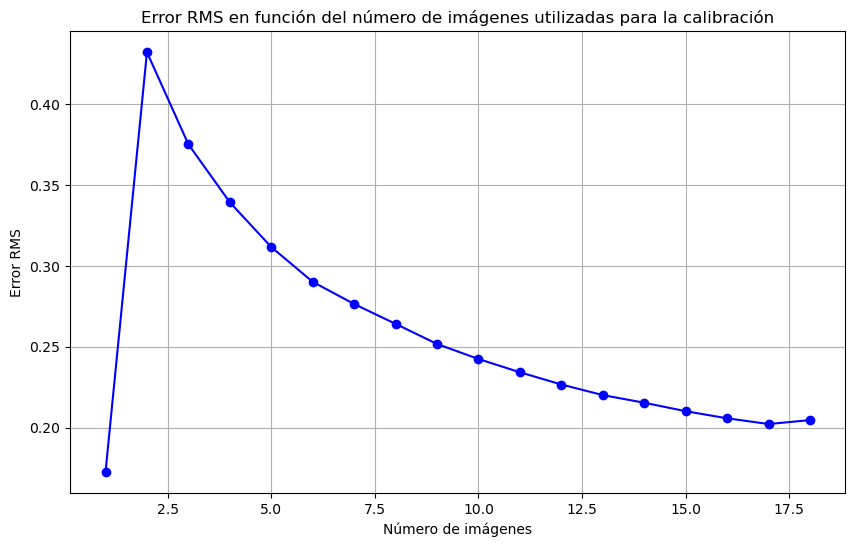

A partir de 15 ya devuelve un error aceptable por lo que con 15 sería suficiente para calibrar la cámara


In [197]:
# TODO Homework
import cv2
import matplotlib.pyplot as plt
import numpy as np

rms_values = []
num_imgs = len(valid_corners) 

chessboard_points = np.zeros((6 * 8, 3), np.float32)
chessboard_points[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) 

for i in range(1, num_imgs + 1):
    selected_imgs_corners = valid_corners[:i]  
    selected_chessboard_points = [chessboard_points] * i  

    intrinsics = np.zeros((3, 3))
    intrinsics[0, 0] = 1.0  
    intrinsics[1, 1] = 1.0  
    distortion = np.zeros((5, 1))  


    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
        selected_chessboard_points,
        selected_imgs_corners,
        (320, 240),  
        intrinsics,
        distortion
    )

    rms_values.append(ret)  

plt.figure(figsize=(10,6))
plt.plot(range(1, num_imgs + 1), rms_values, marker='o', color='b')
plt.title('Error RMS en función del número de imágenes utilizadas para la calibración')
plt.xlabel('Número de imágenes')
plt.ylabel('Error RMS')
plt.grid(True)
plt.show()
print("A partir de 15 ya devuelve un error aceptable por lo que con 15 sería suficiente para calibrar la cámara")

## **Apartado B: Corrección de distorsión** (ojo de pez)

En este apartado se trabajará en la corrección de la distorsión debido a lentes de ojo de pez. Primero se calibrará una cámara con este tipo de lente, utilizando las imágenes de la carpeta ``fisheye``. Posteriormente se utilizarán estos parámetros de calibración para corregir la distorsión de una de las imágenes de calibración.

Los pasos que deberá seguir para calibrar una cámara con distorsión de ojo de pez son:

1. Reutilice el método ``load_images()`` para cargar las imágenes de la carpeta ``fisheye``.
2. Detecte las equinas procesando las imágenes con los métodos ``cv2.findChessboardCorners()`` y ``cv2.cornerSubPix()``.
3. Reutilice la función ``get_chessboard_points()`` para obtener las coordenadas del tablero.
4. Defina los argumentos para la función de calibración.
5. Calibre con ``cv2.fisheye.calibrate()``

### **Tarea B.1:** Reutilice el método ``load_images()`` para cargar las imágenes de la carpeta ``fisheye``

In [198]:
# TODO Build a list containing the paths of all images from the fisheye camera and load images
path = join(dirname(os.getcwd()), "data", "fisheye")
fisheye_imgs_path  = [join(path, f"{img_path}") for img_path in os.listdir(path)]
fisheye_imgs = load_images(fisheye_imgs_path)


C:\Users\Jose Juan\AppData\Local\Temp\ipykernel_14840\283608422.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


### **Tarea B.2:** Detecte las equinas procesando las imágenes con los métodos ``cv2.findChessboardCorners()`` y ``cv2.cornerSubPix()``.

In [199]:
imgs_corners = []
subpix_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)

for img in fisheye_imgs:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray_img, patternSize=(7,6))
    if ret:
        refined_corners = cv2.cornerSubPix(
            gray_img, corners, (7, 7), (-1, -1), subpix_criteria
        )
        if refined_corners is not None:
            imgs_corners.append(refined_corners)


### **Tarea B.3:** Reutilice la función ``get_chessboard_points()`` para obtener las coordenadas del tablero

In [200]:
# TODO Define the chessboard dimensions and the lenght of the squares (in [mm])
chessboard_dims = (7,6)
square_size = 30
get_chessboard_points(chessboard_dims, square_size, square_size)

array([[[  0.,   0.,   0.]],

       [[ 30.,   0.,   0.]],

       [[ 60.,   0.,   0.]],

       [[ 90.,   0.,   0.]],

       [[120.,   0.,   0.]],

       [[150.,   0.,   0.]],

       [[  0.,  30.,   0.]],

       [[ 30.,  30.,   0.]],

       [[ 60.,  30.,   0.]],

       [[ 90.,  30.,   0.]],

       [[120.,  30.,   0.]],

       [[150.,  30.,   0.]],

       [[  0.,  60.,   0.]],

       [[ 30.,  60.,   0.]],

       [[ 60.,  60.,   0.]],

       [[ 90.,  60.,   0.]],

       [[120.,  60.,   0.]],

       [[150.,  60.,   0.]],

       [[  0.,  90.,   0.]],

       [[ 30.,  90.,   0.]],

       [[ 60.,  90.,   0.]],

       [[ 90.,  90.,   0.]],

       [[120.,  90.,   0.]],

       [[150.,  90.,   0.]],

       [[  0., 120.,   0.]],

       [[ 30., 120.,   0.]],

       [[ 60., 120.,   0.]],

       [[ 90., 120.,   0.]],

       [[120., 120.,   0.]],

       [[150., 120.,   0.]],

       [[  0., 150.,   0.]],

       [[ 30., 150.,   0.]],

       [[ 60., 150.,   0.]],

       [[ 

### **Tarea B.4:** Defina los argumentos para la calibración

In [201]:
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC 
intrinsics = np.zeros((3, 3))
intrinsics[0, 0] = 1.0 
intrinsics[1, 1] = 1.0 
intrinsics[0, 2] = 1024 / 2  
intrinsics[1, 2] = 768 / 2  
intrinsics[2, 2] = 1.0

distortion = np.zeros((4, 1))  
distortion[0][0] = -0.5
distortion[1][0] = 0.2
distortion[2][0] = 0.05
rotations = []  

translations = []  

imags_corners = [
    np.array(corners).reshape(-1, 1, 2).astype(np.float32) for corners in imgs_corners if corners is not None
]
object_points = [
    get_chessboard_points(chessboard_dims, square_size, square_size).astype(np.float32) for _ in range(len(imags_corners))
]

### **Tarea B.5:** Calibración

In [202]:
ret, intrinsics, distortion, rotations, translations = cv2.fisheye.calibrate(
    objectPoints=object_points,
    imagePoints=imgs_corners,
    image_size=(1024, 768),  # Tamaño de las imágenes de calibración
    K=intrinsics,  # Matriz intrínseca
    D=distortion,  # Coeficientes de distorsión
    flags=calibration_flags,
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 1e-6)
)

In [203]:
# Show intrinsic matrix and distortion coefficients values
print(intrinsics)
print(distortion)

[[325.94932345   0.         511.5       ]
 [  0.         325.94932345 383.5       ]
 [  0.           0.           1.        ]]
[[0.]
 [0.]
 [0.]
 [0.]]


### **Pregunta B.1:** Corrija la distorsión de las 2 primeras imágenes de la carpeta ``fisheye``

In [204]:
# TODO Search in the documentation to define 'dim'
dim = (1024,768)
map1, map2 = cv2.fisheye.initUndistortRectifyMap(intrinsics, distortion, np.eye(3), intrinsics, dim, cv2.CV_16SC2)

In [205]:
# TODO Homework: correct distortion using cv2.remap()
image = cv2.imread('../data/fisheye/VMRImage1.jpg')

# Supón que ya has definido 'intrinsics', 'distortion', 'dim', 'map1', y 'map2'
# Corrige la distorsión

undistorted_image = cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR)

# Muestra la imagen original y la corregida
cv2.imshow('Original Image', image)
cv2.imshow('Undistorted Image', undistorted_image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

image = cv2.imread('../data/fisheye/VMRImage2.jpg')

# Supón que ya has definido 'intrinsics', 'distortion', 'dim', 'map1', y 'map2'
# Corrige la distorsión

undistorted_image = cv2.remap(image, map1, map2, interpolation=cv2.INTER_LINEAR)

# Muestra la imagen original y la corregida
cv2.imshow('Original Image', image)
cv2.imshow('Undistorted Image', undistorted_image)
cv2.waitKey(5000)
cv2.destroyAllWindows()